# Task 2 - Approximating linear vector fields

In [1]:
from utils import *

import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

Let's load and plot the data of the task:

In [3]:
x0Data = np.loadtxt('./data/linear_vectorfield_data_x0.txt')
x1Data = np.loadtxt('./data/linear_vectorfield_data_x1.txt')

In [4]:
print(x0Data.shape)
print(x1Data.shape)

(2000, 2)
(2000, 2)


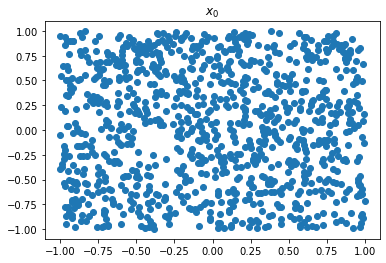

In [4]:
plt.scatter(x0Data[:,0], x0Data[:,1]);
plt.title("$x_0$");

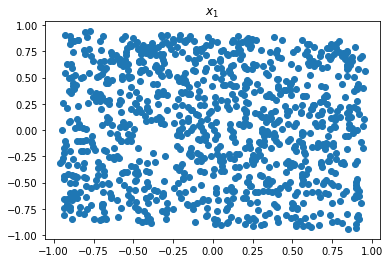

In [5]:
plt.scatter(x1Data[:,0], x1Data[:,1]);
plt.title("$x_1$");

Let's visualize how is the evolution of the vector field:

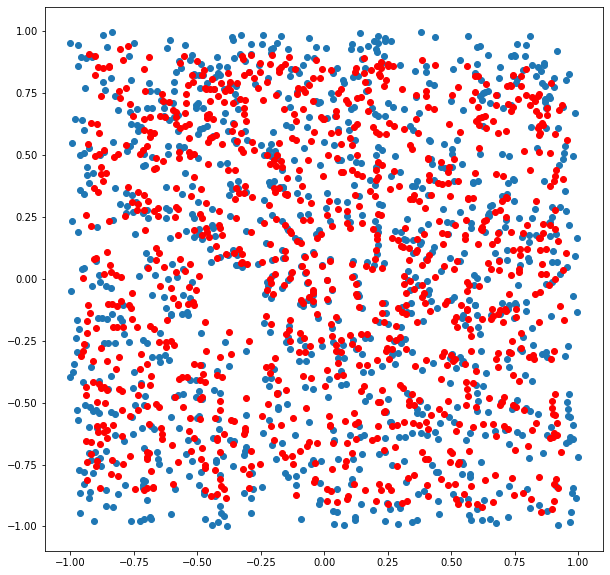

In [6]:
fig = plt.figure(figsize=(10,10))

# x_0 = blue dots; x_1 = red colorts
plt.scatter(x0Data[:,0], x0Data[:,1]);
plt.scatter(x1Data[:,0], x1Data[:,1], color='red');

## 1st Part - Estimation of the linear vector field

We have to estimate the linear vector field used to generate the points $x_1$ from $x_0$.

First, lest use the finite-difference formula:
$$
\hat{v}^{(k)} = \frac{x_1^{(k)} - x_0^{(k)}}{\Delta t}
$$

In [7]:
v = x1Data - x0Data

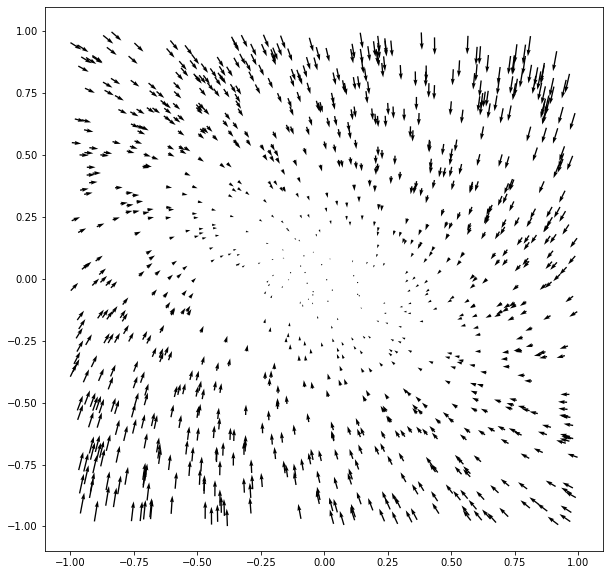

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.quiver(x0Data[:,0], x0Data[:,1], v[:,0], v[:,1]);

Now, let's approximate the matrix $A \in \mathbb{R}^{2\times 2}$ such that

$$
\nu \left( x_0^{(k)} \right) = v^{(k)} = Ax_0^{k)}
$$

In [9]:
# Perform least-squares minimization (y = ax + b) for the x
ax, bx = leastSquaresMinimization(np.column_stack((x0Data[:,0], v[:,0])))

# Perform least-squares minimization (y = ax + b) for the y
ay, by = leastSquaresMinimization(np.column_stack((x0Data[:,1], v[:,1])))

## 2nd Part - Solve the linear system $\dot{x} = \hat{A}x$ with $x_0^{(k)}$ as init points

Let's simulate the obtained system matrix up to a time $T_{end} = 0.1$:

In [10]:
t = 0.1

vx = np.polyval([ax, bx], x0Data[:, 0]) * t
vy = np.polyval([ay, by], x0Data[:, 1]) * t

newX1 = [vx + x0Data[:, 0], vy + x0Data[:, 1]]

Compute the MSE:

In [11]:
np.mean(np.sqrt((newX1[0] - x1Data[:,0])**2 + (newX1[1] - x1Data[:,1])**2)) 

0.05854019299076417

## 3rd Part - Solve system for initial point at $(10, 10)$ and $T_{end} = 100$

Let's solve the system from $(10, 10)$ until $T_{end} = 100$:

In [12]:
xNext = [10, 10]
trajectory = [xNext]

for i in range(1, 101):
    vx = np.polyval([ax, bx], xNext[0])
    vy = np.polyval([ay, by], xNext[1])
    
    xNext = [vx + xNext[0], vy + xNext[1]]
    
    trajectory.append(xNext)
    
trajectory = np.array(trajectory)

Visualize the trajectory together with the phase portrait:

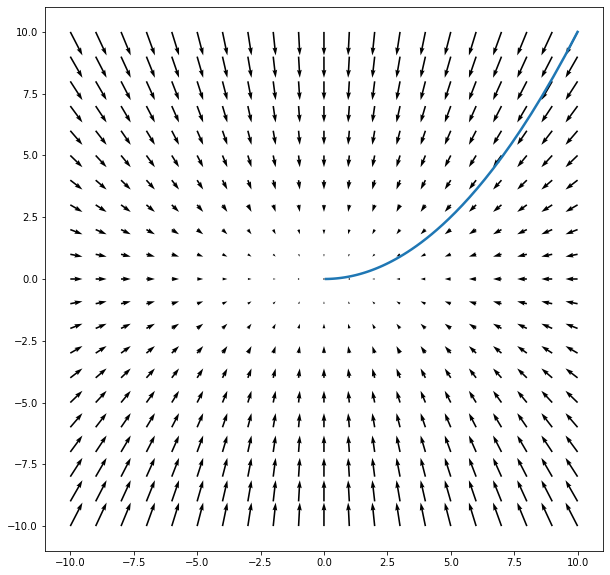

In [13]:
fig = plt.figure(figsize=(10, 10))

x0 = np.arange(-10, 11, 1)
y0 = np.arange(-10, 11, 1)

# Create a grid
X, Y = np.meshgrid(x0, y0)

# Create vectors
vx = np.polyval([ax, bx], X)
vy = np.polyval([ay, by], Y)

# Plot vectors for the phase portrait
plt.quiver(X, Y, vx, vy);

# Plot trajectory from (10, 10) until T_end = 100
plt.plot(trajectory[:,0], trajectory[:,1], linewidth=2.5);